In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [123]:
def standard_scaler(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    scaled_data = (data - mean) / std
    return scaled_data

In [124]:
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

X_sc = standard_scaler(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

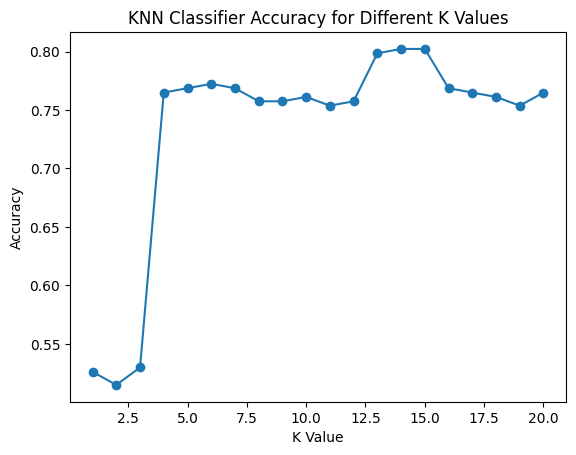

The best K value is: 14


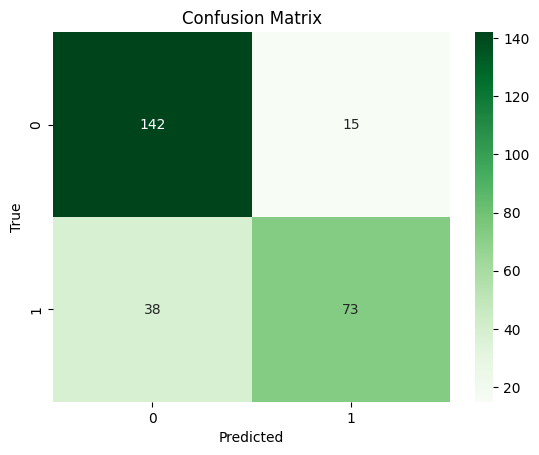

Final Accuracy: 0.8022388059701493


In [125]:
accuracy_list = []

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

plt.plot(range(1, 21), accuracy_list, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.show()

best_k = accuracy_list.index(max(accuracy_list)) + 1
print(f"The best K value is: {best_k}")

final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train, y_train)

y_pred_final = final_knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Accuracy: {final_accuracy}")

In [126]:

knn_model_cv = KNeighborsClassifier(n_neighbors=best_k)
cross_val_scores = cross_val_score(knn_model_cv, X_sc, y, cv=5)

mean_cv_score = np.mean(cross_val_scores)
std_cv_score = np.std(cross_val_scores)

print(f"Mean Cross-Validation Score: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score}")

Mean Cross-Validation Score: 0.7812127298976836
Standard Deviation of Cross-Validation Scores: 0.03370010852961476


The final accuracy on the test data shows that there is an 80.2% accuracy. We got the Best K being 14 from the plot and we got the mean and stadard deviation from the cross validation.